## Telecom Churn Prediction

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
sns.set(style = 'white')
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
#Load the data
data  = pd.read_csv("telecom_users.csv")

In [3]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
data.shape

(5986, 22)

In [5]:
data  = pd.read_csv("telecom_users.csv",usecols=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

In [6]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
data.shape

(5986, 20)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [9]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [11]:
data['TotalCharges'].dtypes

dtype('float64')

In [12]:
data.isnull().sum(axis=0)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

Median : 1412.15 ,  Mean : 2298.0606174698796 


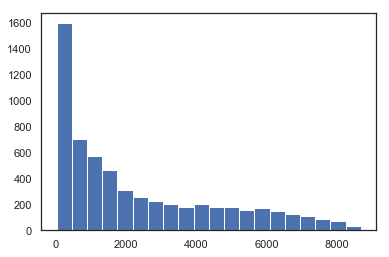

In [13]:
# Taking care of missing values on TotalCharges attribute
plt.hist(data["TotalCharges"],bins =20)
TotalCharges_median=data["TotalCharges"].median(skipna=True)
TotalCharges_mean=data["TotalCharges"].mean(skipna=True)
print("Median : {} ,  Mean : {} ".format(TotalCharges_median,TotalCharges_mean))

In [14]:
# Since the graph is right/positively skewed, choosing median imputation
data["TotalCharges"].fillna(TotalCharges_median, inplace=True)

In [15]:
data["TotalCharges"].isnull().sum(axis=0)

0

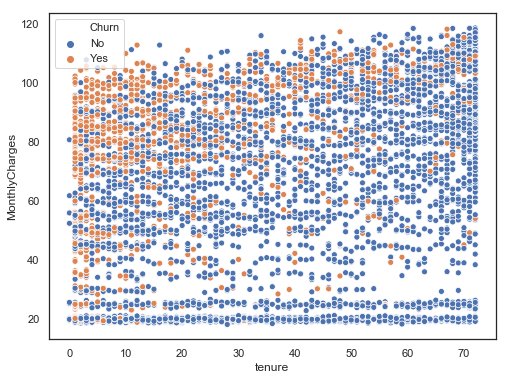

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="tenure", y="MonthlyCharges", hue="Churn", data=data)

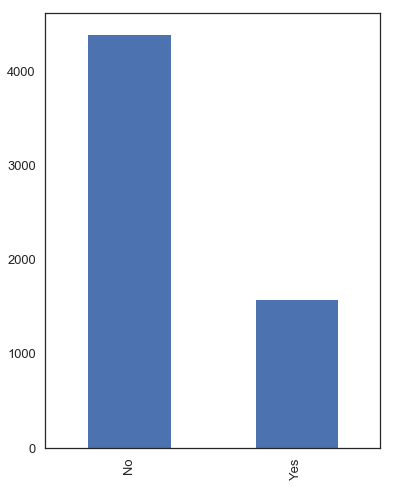

In [17]:
ax = data["Churn"].value_counts().plot(kind="bar", figsize=(6,8), fontsize=13)

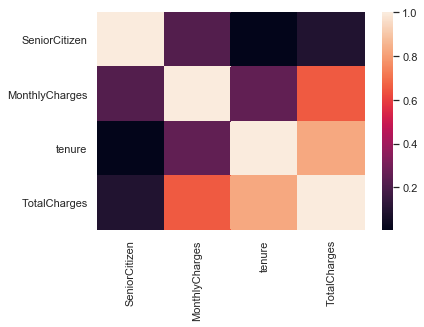

In [18]:
ax = sns.heatmap(data[["gender", "SeniorCitizen", "MonthlyCharges", "tenure" ,"TotalCharges", "Churn"]].corr())

In [19]:
# Declaring the dependent and independent variables
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [20]:
label_encoder = preprocessing.LabelEncoder()
X['gender'] = label_encoder.fit_transform(X['gender'])
X['Partner'] = label_encoder.fit_transform(X['Partner'])
X['Dependents'] = label_encoder.fit_transform(X['Dependents'])
X['PhoneService'] = label_encoder.fit_transform(X['PhoneService'])
X['PaperlessBilling'] = label_encoder.fit_transform(X['PaperlessBilling'])
Y = label_encoder.fit_transform(Y)

In [21]:
X = pd.get_dummies(X, columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])

In [22]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,72,1,0,24.10,1734.65,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,0,44,1,1,88.15,3973.20,1,...,1,0,0,1,0,0,0,1,0,0
2,0,1,1,0,38,1,1,74.95,2869.85,0,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,4,1,1,55.90,238.50,1,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,53.45,119.50,1,...,1,0,0,1,0,0,0,0,1,0


In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Utility Functions

In [24]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [25]:
# Display binary confusion matrix as a Seaborn heatmap

def confusion_plot(matrix, labels=None):
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('CONFUSION MATRIX')
    plt.close()
    
    return fig

In [26]:
# Plot Receiver Operating Characteristic (ROC) curve Set `compare=True` to use this function to compare classifiers.

def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis, label=label)
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [27]:
# Plot Precision-Recall curve. Set `compare=True` to use this function to compare classifiers.

def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    if compare:
        sns.lineplot(r, p, ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [28]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [29]:
# Trains the passed classifier if not already trained and reports various metrics of the trained classifier

def report(clf, x_train, y_train, x_test, y_test, sample_weight=None,
           refit=False, importance_plot=False, confusion_labels=None, verbose=True):
  
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, train_acc, train_time = train_clf(clf, x_train, y_train,
                                                     sample_weight=sample_weight,
                                                     refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_probs)
    
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("------------------------------------------")
    print(" Area Under ROC: ", roc_auc)
    print("------------------------------------------")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        for ax in axes[1, :]:
            ax.remove()

        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, train_acc=train_acc, train_time=train_time,
                train_predictions=train_predictions, test_acc=test_acc,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
               )
    
    return clf, dump

In [30]:
 """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
        fig: `matplotlib` figure object with ROC and PR curves """

    
def compare_models(y_test=None, clf_reports=[], labels=[]):
    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train Accuracy', 'Test Accuracy', 'Overfitting', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        train_acc = round(clf_reports[i]['train_acc'], 3)
        test_acc = round(clf_reports[i]['test_acc'], 3)
        clf_probs = clf_reports[i]['test_probs']
        roc_auc = clf_reports[i]['roc_auc']
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = [train_acc, test_acc,
                               test_acc < train_acc, roc_auc] + true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

In [31]:
confusion_lbs = ['No Churn', 'Churn']

### Logistic regression

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    4.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.1s finished


Accurary: 0.8188647746243739
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 4788 samples
 Test Size: 1198 samples
------------------------------------------
Training Time: 0.636 seconds
 Testing Time: 0.001 seconds
------------------------------------------
Train Accuracy:  0.802422723475355
 Test Accuracy:  0.8188647746243739
------------------------------------------
 Area Under ROC:  0.849653957

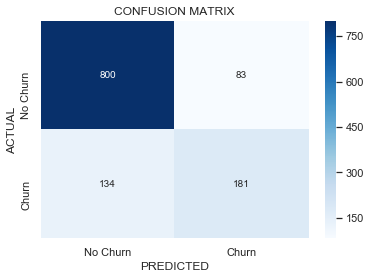


=======================================> PLOTS <=========================================


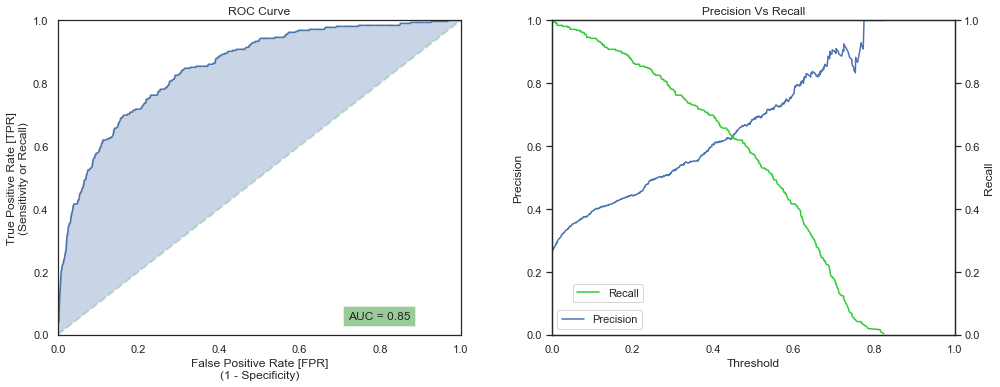

In [32]:
from sklearn.linear_model import LogisticRegression

# Define the hyperpararmeters we want to tune
penalty = ['l1','l2'] 
solver = ['liblinear', 'saga'] 
param_grid = dict(penalty=penalty, solver=solver) 

# Instantiate GridSearchCV, fit the model and make prediction
logistic = LogisticRegression() 
logistic_reg = GridSearchCV(estimator=logistic, 
param_grid=param_grid, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 
logistic_reg.fit(X_train, Y_train)
Y_pred = logistic_reg.predict(X_test)
correct_prediction = (Y_test==Y_pred)
accuracy = np.sum(correct_prediction)/len(correct_prediction)
print("Accurary: " + str(accuracy))
logistic_reg, logistic_reg_report = report(logistic_reg, X_train, Y_train, X_test, Y_test, refit=True, importance_plot=True,confusion_labels=confusion_lbs)

### Support Vector Machine(SVM)

In [33]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

Accurary: 0.8130217028380634
GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 4788 samples
 Test Size: 1198 samples
------------------------------------------
Training Time: 923.328 seconds
 Testing Time: 0.148 seconds
------------------------------------------
Train Accuracy:  0.815998329156224
 Test Accuracy:  0.8130217028380634
------------------------------

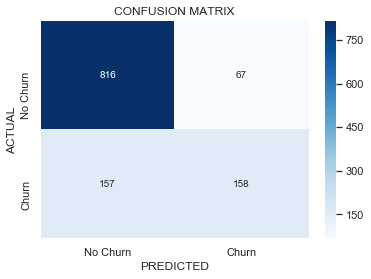


=======================================> PLOTS <=========================================


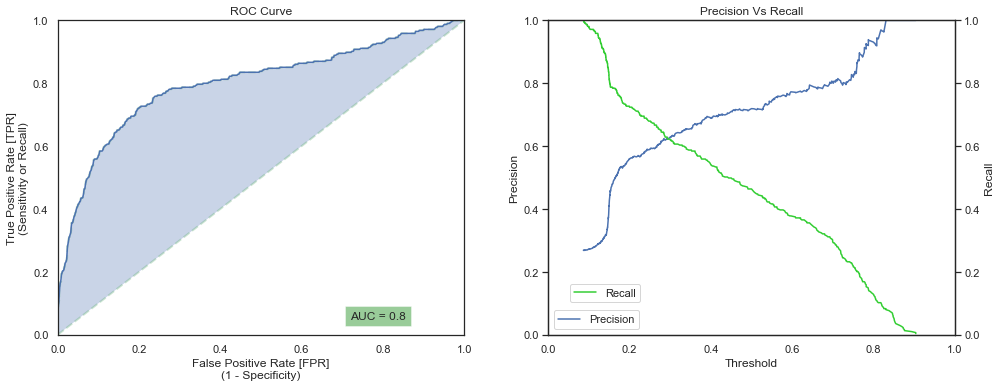

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperpararmeters we want to tune
param_grid = {
    'kernel': ['linear','poly','rbf'],
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'gamma' : [0.001, 0.01, 0.1, 1]
}

# Instantiate GridSearchCV, fit the model and make prediction
svc = GridSearchCV(SVC(probability=True), param_grid=param_grid)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accurary: " + str(accuracy))
svc, svm_report = report(svc, X_train, Y_train, X_test, Y_test, refit=True, importance_plot=True,confusion_labels=confusion_lbs)

### Random Forest Classifier

Accurary: 0.8088480801335559
GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [500, 700, 1000], 'max_depth': [None, 5, 15, 20, 30], 'min_samples_split': [5, 30], 'min_samples_leaf': [5, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 4788 samples
 Test Size: 1198 

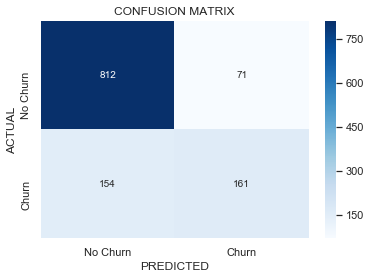


=======================================> PLOTS <=========================================


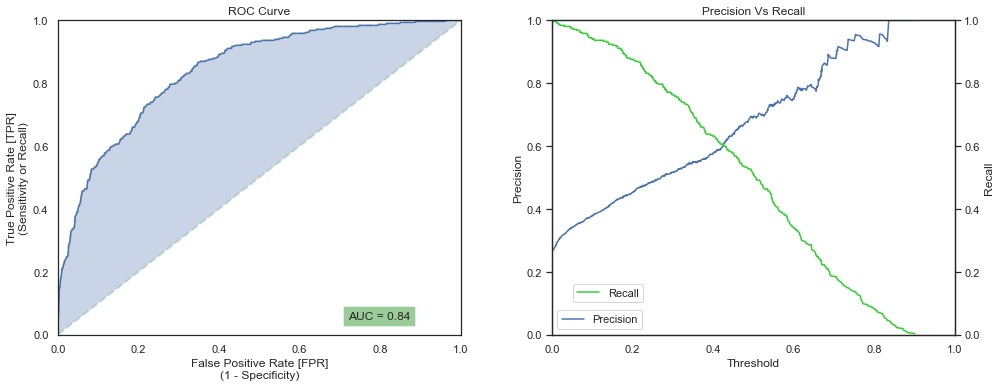

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperpararmeters we want to tune
param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators': [500,700,1000],
    'max_depth' : [None, 5, 15, 20, 30],
    'min_samples_split' : [5,30],
    'min_samples_leaf' : [5,30]
}

# Instantiate GridSearchCV, fit the model and make prediction

random_forest_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
random_forest_model.fit(X_train, Y_train)
Y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accurary: " + str(accuracy))
random_forest_model, random_forest_report = report(random_forest_model, X_train, Y_train, X_test, Y_test, refit=True, importance_plot=True,confusion_labels=confusion_lbs)

### K-Nearest Neighbours

Accurary: 0.8080133555926544
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=89, p=1,
           weights='uniform')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 4788 samples
 Test Size: 1198 samples
------------------------------------------
Training Time: 0.01 seconds
 Testing Time: 0.136 seconds
------------------------------------------
Train Accuracy:  0.7992898913951546
 Test Accuracy:  0.8080133555926544
------------------------------------------
 Area Under ROC:  0.8381060238364881
------------------------------------------

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.87      0.87      0.87       883
       Churn       0.64      0.62      0.63       315

   micro avg       0.81      0.81      0.81      1198
   macro avg     

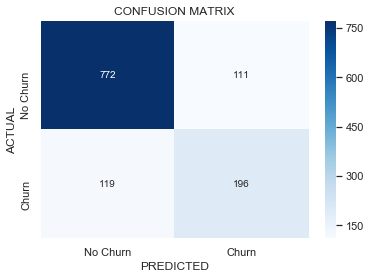


=======================================> PLOTS <=========================================


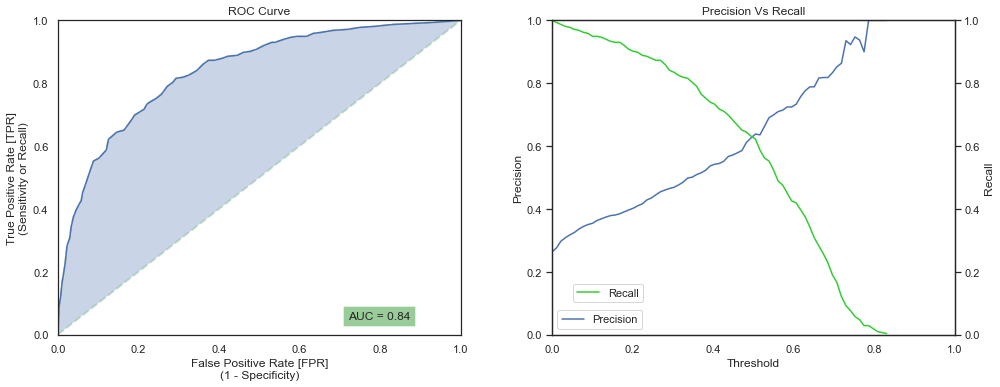

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Find the optimal k
best_k = 0
best_score = 0
neighbors = range(1,91,2) # will consider min_k = 1, max_k = 91, only odd numbers
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,p=1, weights='uniform', n_jobs=-1)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    # We will consider the optimal K to be the K that produces the highest f1 score
    f1 = metrics.f1_score(Y_test,Y_pred)
    if f1 > best_score:
        best_k = k
        best_score = f1
        
# Instantiate the classifier with the optimal K, fit model and make prediction
knn = KNeighborsClassifier(n_neighbors=best_k,p=1, weights='uniform', n_jobs=-1)
knn.fit(X_train,Y_train)
Y_pred_new = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_new)
print("Accurary: " + str(accuracy))
knn, knn_report= report(knn, X_train, Y_train, X_test, Y_test, refit=True, importance_plot=True,confusion_labels=confusion_lbs)